In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [2]:
#Read the file
import pandas
data=pd.read_csv("reviews.csv",error_bad_lines=False)

In [3]:
data

,id,profileName,text,date,title,rating,images,helpful,Colour
0,RKI9K6OLAAEKS,Ebin J.,\n Let me clear the air by mentioning that I ...,Reviewed in India on 20 January 2020,The Headphone you want to fall in Love but can...,4,NaN,96,Copper Black
1,RYZTY280VFLX9,aambuj,\n Serious defect in the firmware hangs-up th...,Reviewed in India on 10 February 2020,"Not worth the money, defect in firmware/headset",1,https://images-na.ssl-images-amazon.com/images...,10,Copper Black
2,R585G0UB89PZC,Amazon Customer,\n 2 things that best describe the headsets- ...,Reviewed in India on 10 July 2019,Love it!,5,NaN,11,NaN
3,R2XOGYQ2P40BP1,Nimit,"\n Being a Jabra owner and user, I am not ove...",Reviewed in India on 4 February 2021,Decent Over Ear Headphones,4,https://images-na.ssl-images-amazon.com/images...,1,Copper Black
4,R2KMGKIYU1C24Y,AV,\n If you are music buff or a frequent travel...,Reviewed in India on 10 July 2019,Carry is everywhere,5,NaN,1,NaN
5,RRVZYP1U34S73,Kannu,\n Jabra Elite 85h is one of the best noise c...,Reviewed in India on 7 January 2020,Amazing headphones. ANC is superb and is worth...,5,NaN,1,Copper Black
6,R3HBQVJX8D54M3,Saurabh vashisht,\n Noise cancellation works as expected. Soun...,Reviewed in India on 5 August 2019,You'll never know the difference but it`s there.,4,NaN,1,NaN
7,RA8BHMP0R4HVI,Harish A.,\n So I wanted a pair of noise cactive cancel...,Reviewed in India on 24 December 2020,"Excellent pair of BT ANC headphones, if you ge...",4,https://images-na.ssl-images-amazon.com/images...,1,Copper Black
8,R1IG2ZHGHH23J3,Rohan khurana,\n The best part of these headphones is that ...,Reviewed in India on 3 July 2021,Best of All the Worlds,5,NaN,1,Copper Black
9,R1ZJ4I4QZP0J3A,Rishik,\n Pros:1. Anc is powerful. It drains most of...,Reviewed in India on 19 October 2020,Pretty good headphones with powerful ANC,5,https://images-na.ssl-images-amazon.com/images...,0,Copper Black


In [4]:
data1=data["text"]

In [5]:
data1

0     \n  Let me clear the air by mentioning that I ...
1     \n  Serious defect in the firmware hangs-up th...
2     \n  2 things that best describe the headsets- ...
3     \n  Being a Jabra owner and user, I am not ove...
4     \n  If you are music buff or a frequent travel...
5     \n  Jabra Elite 85h is one of the best noise c...
6     \n  Noise cancellation works as expected. Soun...
7     \n  So I wanted a pair of noise cactive cancel...
8     \n  The best part of these headphones is that ...
9     \n  Pros:1. Anc is powerful. It drains most of...
10    \n  Ordered it and received in two days. From ...
11    \n  Yes , I have returned the headphones for t...
12    \n  It rebooted on me in the middle of a call ...
13    \n  Bought the headset with lots of excitement...
14    \n  Sound stage is very good and battery life ...
15    \n  I am writing this review after using it fo...
16    \n  I bought this headphones in Jan 2020, they...
17    \n  ANC - 3.5/5 (Bose QC II or 700 and Son

In [6]:
data1=pd.DataFrame(data1)

In [7]:
data1

,text
0,\n Let me clear the air by mentioning that I ...
1,\n Serious defect in the firmware hangs-up th...
2,\n 2 things that best describe the headsets- ...
3,"\n Being a Jabra owner and user, I am not ove..."
4,\n If you are music buff or a frequent travel...
5,\n Jabra Elite 85h is one of the best noise c...
6,\n Noise cancellation works as expected. Soun...
7,\n So I wanted a pair of noise cactive cancel...
8,\n The best part of these headphones is that ...
9,\n Pros:1. Anc is powerful. It drains most of...


In [8]:
#Sentiment analysis
afinn = pd.read_csv('Afinn (1).csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [10]:
data1 = [text.strip() for text in data1.text]#removing blank spaces
data1 = [text for text in data1 if text]#removing black lines

In [11]:
data1

['Let me clear the air by mentioning that I have returned the product after about 2 weeks of usage with 2 different products. Both of my devices suffered a crackling sound when some of the bass notes being played. I have updated the firmware to the latest on both the device, but it didn\'t seems to be fixing the issue. This issue seems to be occurring to more than a few of the customers and I\'m writing this review keeping in mind that if the device did not have this issue at all. Even my ratings are provided by considering one will get a device without the issue that I have mentioned.When I was in search for an ANC headphone, I had 3 options. Jabra Elite 85h, Sony WH-1000XM3 and Bose 700. The review is also for the people who are in the same dilemma as me 2020.#Design and LooksLooks are very subjective. I have had the copper black version of the Jabra and it looked stunning. I also believe the design of Jabra is aesthetically pleasing comparing to the other devices listed. Bose 700 do

In [12]:
#tokenizing
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(data1))
sentences[0:15]

['Let me clear the air by mentioning that I have returned the product after about 2 weeks of usage with 2 different products.',
 'Both of my devices suffered a crackling sound when some of the bass notes being played.',
 "I have updated the firmware to the latest on both the device, but it didn't seems to be fixing the issue.",
 "This issue seems to be occurring to more than a few of the customers and I'm writing this review keeping in mind that if the device did not have this issue at all.",
 'Even my ratings are provided by considering one will get a device without the issue that I have mentioned.When I was in search for an ANC headphone, I had 3 options.',
 'Jabra Elite 85h, Sony WH-1000XM3 and Bose 700.',
 'The review is also for the people who are in the same dilemma as me 2020.#Design and LooksLooks are very subjective.',
 'I have had the copper black version of the Jabra and it looked stunning.',
 'I also believe the design of Jabra is aesthetically pleasing comparing to the oth

In [13]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,Let me clear the air by mentioning that I have...
1,Both of my devices suffered a crackling sound ...
2,I have updated the firmware to the latest on b...
3,This issue seems to be occurring to more than ...
4,Even my ratings are provided by considering on...
...,...
329,Battery life is amazingNoise cancellation and ...
330,It is very flat.
331,I got this at a discounted price of about 15k ...
332,Not worth the money.


In [14]:
#frequency of words
freq1 = pd.Series(' '.join(sent_df['sentence']).split()).value_counts()[:50] # for top 20
freq1

the           260
and           192
is            140
to            140
a             123
I             111
for           108
it             85
of             80
are            68
on             65
not            60
in             55
you            55
with           52
but            51
this           49
have           42
can            41
Jabra          40
headphones     40
my             39
was            38
quality        38
Sony           38
good           37
that           36
The            36
be             35
as             34
sound          32
or             30
-              28
Bose           27
when           26
at             25
these          23
It             23
ANC            23
better         23
has            22
2              21
from           21
like           20
than           20
noise          20
if             20
very           20
them           19
use            19
dtype: int64

In [15]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91701\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91701\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
my_stopwords = stopwords.words('english')
my_stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [17]:
#removing stopwords
sent_df['sentence1'] = sent_df['sentence'].apply(lambda x: ' '.join([x for x in x.split() if x not in (my_stopwords)]))

In [18]:
#removing punctuations
sent_df['clean'] = sent_df['sentence1'].apply(lambda x: ' '.join([x for x in x.split() if x not in string.punctuation]))

In [19]:
sent_df

,sentence,sentence1,clean
0,Let me clear the air by mentioning that I have...,Let clear air mentioning I returned product 2 ...,Let clear air mentioning I returned product 2 ...
1,Both of my devices suffered a crackling sound ...,Both devices suffered crackling sound bass not...,Both devices suffered crackling sound bass not...
2,I have updated the firmware to the latest on b...,"I updated firmware latest device, seems fixing...","I updated firmware latest device, seems fixing..."
3,This issue seems to be occurring to more than ...,This issue seems occurring customers I'm writi...,This issue seems occurring customers I'm writi...
4,Even my ratings are provided by considering on...,Even ratings provided considering one get devi...,Even ratings provided considering one get devi...
...,...,...,...
329,Battery life is amazingNoise cancellation and ...,Battery life amazingNoise cancellation app nee...,Battery life amazingNoise cancellation app nee...
330,It is very flat.,It flat.,It flat.
331,I got this at a discounted price of about 15k ...,I got discounted price 15k price head set stee...,I got discounted price 15k price head set stee...
332,Not worth the money.,Not worth money.,Not worth money.


In [20]:
sent_df=sent_df.drop('sentence',axis=1)

In [21]:
sent_df=sent_df.drop('sentence1',axis=1)

In [22]:
sent_df

,clean
0,Let clear air mentioning I returned product 2 ...
1,Both devices suffered crackling sound bass not...
2,"I updated firmware latest device, seems fixing..."
3,This issue seems occurring customers I'm writi...
4,Even ratings provided considering one get devi...
...,...
329,Battery life amazingNoise cancellation app nee...
330,It flat.
331,I got discounted price 15k price head set stee...
332,Not worth money.


In [23]:
from itertools import islice
def take(n,iterable):
    "Return first n items of the iterable as list"
    return list(islice(iterable,n))

In [24]:
#coverting to dic format and for 20 words
affinity_scores = afinn.set_index('word')['value'].to_dict()
take(20,affinity_scores.items())

[('abandon', -2),
 ('abandoned', -2),
 ('abandons', -2),
 ('abducted', -2),
 ('abduction', -2),
 ('abductions', -2),
 ('abhor', -3),
 ('abhorred', -3),
 ('abhorrent', -3),
 ('abhors', -3),
 ('abilities', 2),
 ('ability', 2),
 ('aboard', 1),
 ('absentee', -1),
 ('absentees', -1),
 ('absolve', 2),
 ('absolved', 2),
 ('absolves', 2),
 ('absolving', 2),
 ('absorbed', 1)]

In [26]:
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        clean = nlp(text)
        for word in clean:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [27]:
#calulating the sentiment value for each sentence
sent_df['sentiment_value'] = sent_df['clean'].apply(calculate_sentiment)

In [28]:
sent_df['sentiment_value']

0      1
1     -2
2      0
3      0
4      0
      ..
329    0
330    0
331    3
332    2
333    3
Name: sentiment_value, Length: 334, dtype: int64

In [30]:
#calulating the number of words in each sentence
sent_df['word_count'] = sent_df['clean'].str.split().apply(len)
sent_df['word_count'].head(10)

0    13
1     8
2     8
3    13
4    18
5     7
6     8
7     7
8    10
9     7
Name: word_count, dtype: int64

In [31]:
#sort based on sentiment value
sent_df.sort_values(by='sentiment_value').head(10)

,clean,sentiment_value,word_count
21,"Jabra definitely bad, cut high frequency sound...",-4,10
245,The pain severe I could use headphones mins,-4,8
54,So awful experience first premium headset.,-3,6
53,"Too much cost, bad headset.I returned mine 2 d...",-3,13
33,It's bad par two models.,-3,5
44,Serious defect firmware hangs-up headset.,-3,5
202,No problem battery life.5.,-3,4
125,"Sony Bose better NC, Sony's call quality infer...",-2,10
38,Now shouldn’t problem you’re streaming Spotify...,-2,9
246,My calls run hours day simply work due pain.,-2,9


In [32]:
sent_df['sentiment_value'].describe() #Here the max sentiment value is 13 and min value is -4

count    334.000000
mean       1.592814
std        2.554289
min       -4.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       13.000000
Name: sentiment_value, dtype: float64

In [33]:
#sentiment value less than or equal to 0
sent_df[sent_df['sentiment_value']<=0]

,clean,sentiment_value,word_count
1,Both devices suffered crackling sound bass not...,-2,8
2,"I updated firmware latest device, seems fixing...",0,8
3,This issue seems occurring customers I'm writi...,0,13
4,Even ratings provided considering one get devi...,0,18
5,"Jabra Elite 85h, Sony WH-1000XM3 Bose 700.",0,7
...,...,...,...
324,Decent ANC.3.,0,2
326,The Jabra sound+ app adjust settings.6.,0,6
328,"Sent replacement, 3 months, replacement provided.",0,6
329,Battery life amazingNoise cancellation app nee...,0,10


In [34]:
#sentiment value greater than 0
sent_df[sent_df['sentiment_value']>0]

,clean,sentiment_value,word_count
0,Let clear air mentioning I returned product 2 ...,1,13
7,I copper black version Jabra looked stunning.,4,7
9,Bose 700 looks futuristic synonym good looking.,3,7
24,I'm avid listener preference music almost alwa...,2,9
25,"I prefer clarity bass, I like vocals string ""h...",4,9
...,...,...,...
325,good battery life5.,3,3
327,Build quality amazing These uncomfortable wear...,1,22
331,I got discounted price 15k price head set stee...,3,20
332,Not worth money.,2,3


In [35]:
sent_df['index']=range(0,len(sent_df))

In [36]:
sent_df

,clean,sentiment_value,word_count,index
0,Let clear air mentioning I returned product 2 ...,1,13,0
1,Both devices suffered crackling sound bass not...,-2,8,1
2,"I updated firmware latest device, seems fixing...",0,8,2
3,This issue seems occurring customers I'm writi...,0,13,3
4,Even ratings provided considering one get devi...,0,18,4
...,...,...,...,...
329,Battery life amazingNoise cancellation app nee...,0,10,329
330,It flat.,0,2,330
331,I got discounted price 15k price head set stee...,3,20,331
332,Not worth money.,2,3,332


C:\Users\91701\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

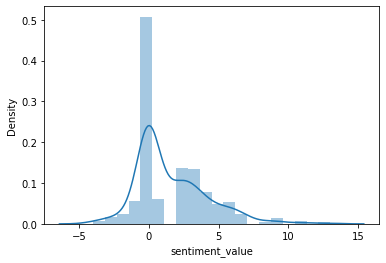

In [41]:
#densityplot
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

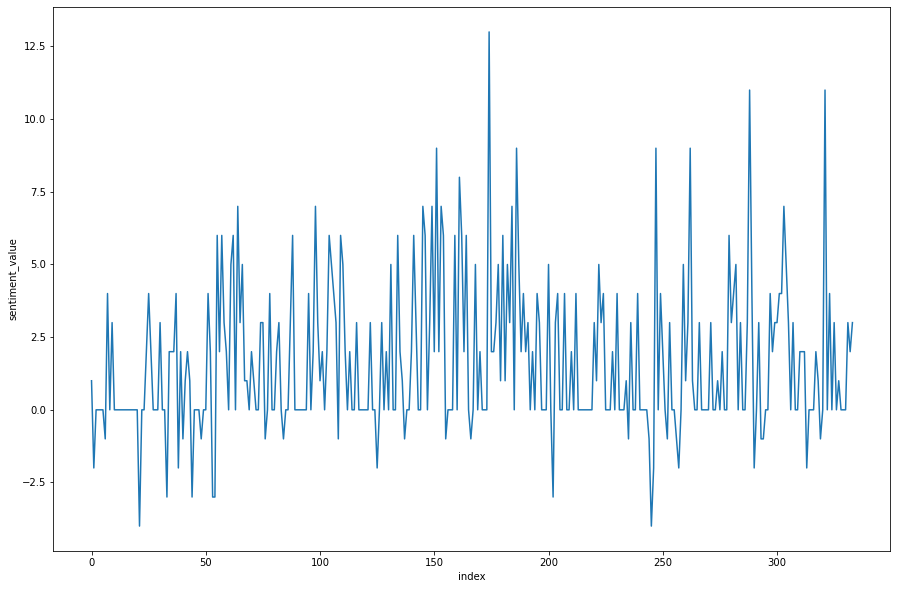

In [39]:
#lineplot based on sentiment value
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

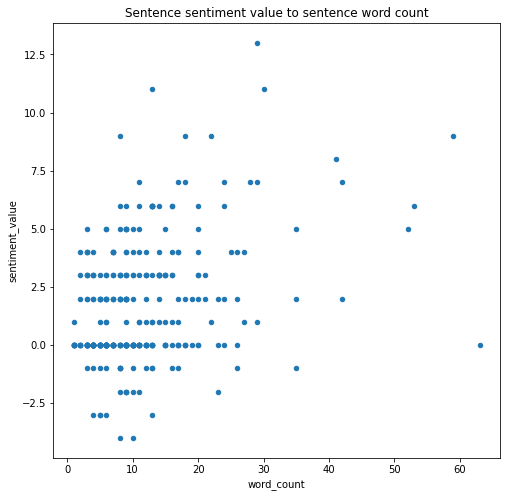

In [40]:
#scatterplot between wordcount and sentiment value
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

# Here most of the reviews are neutral still negative reviews very less comparing to the postive.So from overall reviews we can conclude that its a good product